In [56]:
import numpy as np
data= np.load("/content/FalknerSkan_n0.08.npz")

In [57]:
u = data['u']
v = data['v']
x = data['x']
y = data['y']
p = data['p']
x = x - x.min()
y = y - y.min()
ref = np.stack((u, v, p))

In [58]:
truth = np.stack([u, v, p], axis=-1)
truth

array([[[-3.45489765e-20,  7.62681833e-26,  1.49636896e+01],
        [-4.09977888e-20, -5.60617450e-24,  1.49649049e+01],
        [-1.10770791e-19, -6.58910720e-23,  1.49660910e+01],
        ...,
        [ 2.76350761e-20,  2.44010129e-23,  1.50507369e+01],
        [-3.03847910e-20,  3.20504349e-26,  1.50509292e+01],
        [-3.03750516e-20,  3.19811591e-26,  1.50511205e+01]],

       [[ 3.83942463e-03,  3.37190139e-06,  1.49636896e+01],
        [ 3.78497103e-03,  3.28903314e-06,  1.49649049e+01],
        [ 3.74358314e-03,  3.22666357e-06,  1.49660910e+01],
        ...,
        [ 1.42034126e-03,  5.96456165e-07,  1.50507369e+01],
        [ 1.41611370e-03,  5.93367103e-07,  1.50509292e+01],
        [ 1.41398222e-03,  5.91812218e-07,  1.50511205e+01]],

       [[ 7.77204964e-03,  1.09587191e-05,  1.49636896e+01],
        [ 7.66932579e-03,  1.05979487e-05,  1.49649049e+01],
        [ 7.58317162e-03,  1.03125969e-05,  1.49660910e+01],
        ...,
        [ 2.84068252e-03,  1.19291233e-06,

In [59]:
import jax
import jax.numpy as jnp
import flax
from flax import nnx

class PINN(nnx.Module):
    def __init__(self, *, rngs: nnx.Rngs):
      self.linear1=nnx.Linear(2,20,rngs=rngs)
      self.linear2=nnx.Linear(20,20,rngs=rngs)
      self.linear3=nnx.Linear(20,20,rngs=rngs)
      self.linear4=nnx.Linear(20,20,rngs=rngs)
      self.linear5=nnx.Linear(20,20,rngs=rngs)
      self.linear6=nnx.Linear(20,20,rngs=rngs)
      self.linear7=nnx.Linear(20,20,rngs=rngs)
      self.linear8=nnx.Linear(20,3,rngs=rngs)

    def __call__(self,x):
      x=nnx.relu(self.linear1(x))
      x=nnx.relu(self.linear2(x))
      x=nnx.relu(self.linear3(x))
      x=nnx.relu(self.linear4(x))
      x=nnx.relu(self.linear5(x))
      x=nnx.relu(self.linear6(x))
      x=nnx.relu(self.linear7(x))
      x=(self.linear8(x))
      return x

model = PINN(rngs=nnx.Rngs(0))
nnx.display(model)


In [60]:
#boundary points
bc_list = []
for i in range(501):
  bc_list.append([x[:,200][i],y[:,200][i]])

for i in range(501):
  bc_list.append([x[:,0][i],y[:,0][i]])

for i in range(201):
  bc_list.append([x[0,:][i],y[0,:][i]])

for i in range(201):
  bc_list.append([x[500,:][i],y[500,:][i]])
bc = np.array(bc_list)


truth_list = []
for i in range(501):
  truth_list.append([truth[:,200][i]])

for i in range(501):
  truth_list.append([truth[:,0][i]])

for i in range(201):
  truth_list.append([truth[0,:][i]])

for i in range(201):
  truth_list.append([truth[500,:][i]])
truth_bc = jnp.array(truth_list)
truth_bc.reshape((1404,3))

Array([[-3.0375051e-20,  3.1981158e-26,  1.5051121e+01],
       [ 1.4139822e-03,  5.9181224e-07,  1.5051121e+01],
       [ 2.8261270e-03,  1.1822856e-06,  1.5051121e+01],
       ...,
       [ 7.7345443e-01,  3.4176011e-02,  1.5050736e+01],
       [ 7.7320445e-01,  3.4074642e-02,  1.5050929e+01],
       [ 7.7295566e-01,  3.3974104e-02,  1.5051121e+01]], dtype=float32)

In [61]:
pos_list = []
for i in range(501):
  for j in range(201):
    pos_list.append([x[i][j],y[i][j]])
pos = np.array(pos_list)

model(pos)

Array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-4.1286740e-03, -4.4556716e-03, -9.2817703e-04],
       [-8.2573481e-03, -8.9113433e-03, -1.8563541e-03],
       ...,
       [-9.5346272e-01, -4.6195412e-01, -2.1245866e-01],
       [-9.5979851e-01, -4.7251549e-01, -2.1911128e-01],
       [-9.6613353e-01, -4.8307696e-01, -2.2576331e-01]], dtype=float32)

In [62]:
truth.shape

(501, 201, 3)

In [63]:
truth1=truth.reshape((100701, 3))
truth1


array([[-3.45489765e-20,  7.62681833e-26,  1.49636896e+01],
       [-4.09977888e-20, -5.60617450e-24,  1.49649049e+01],
       [-1.10770791e-19, -6.58910720e-23,  1.49660910e+01],
       ...,
       [ 7.73454413e-01,  3.41760121e-02,  1.50507369e+01],
       [ 7.73204454e-01,  3.40746423e-02,  1.50509292e+01],
       [ 7.72955666e-01,  3.39741046e-02,  1.50511205e+01]])

In [64]:
# Boundary points
cp_step = 100
bc_step = 10
ind_bc = np.zeros(x.shape, dtype = bool)
ind_bc[[0, -1], ::bc_step] = True
ind_bc[:, [0, -1]] = True

x_bc = x[ind_bc].flatten()
y_bc = y[ind_bc].flatten()

u_bc = u[ind_bc].flatten()
v_bc = v[ind_bc].flatten()

bc = np.array([x_bc, y_bc, u_bc, v_bc]).T

ni = 2
nv = bc.shape[1] - ni + 1
pp = 1

# Randomly select half of Boundary points
indx_bc = np.random.choice([False, True], len(bc), p=[1 - pp, pp])
bc = bc[indx_bc]

n_bc = len(bc)
bc

array([[ 0.00000000e+00,  0.00000000e+00, -3.45489765e-20,
         7.62681833e-26],
       [ 1.00000000e+00,  0.00000000e+00, -3.40486679e-20,
         6.91162451e-26],
       [ 2.00000000e+00,  0.00000000e+00, -1.14881084e-19,
        -6.11254005e-23],
       ...,
       [ 1.80000000e+01,  5.00000000e+00,  7.78141897e-01,
         3.61360864e-02],
       [ 1.90000000e+01,  5.00000000e+00,  7.75492094e-01,
         3.50140016e-02],
       [ 2.00000000e+01,  5.00000000e+00,  7.72955666e-01,
         3.39741046e-02]])

In [65]:
from functools import partial
from jax import vmap

def loss_bc(model,bc,truth):
  logit=model(bc)
  loss=jnp.mean((logit-truth)**2)
  return loss


from jax import vmap
import jax.numpy as jnp

def loss_bc_map(model, bc):
    def single_loss(b):
        inp = jnp.array([b[0], b[1]])  # x, y as input
        logit = model(inp)            # model predicts [u, v]
        mse = (logit[0] - b[2])**2 + (logit[1] - b[3])**2
        return mse

    return vmap(single_loss)(bc).mean()


loss_bc_map(model, bc)

Array(1.5881573, dtype=float32)

In [66]:
from jax import grad
from jax import hessian

def loss_mse(model, x):
    def single_loss(x):
        nu=0.1
        u_fn = lambda x: model(x)[0]
        v_fn = lambda x: model(x)[1]
        p_fn = lambda x: model(x)[2]

        grad_u = grad(u_fn)(x)
        grad_v = grad(v_fn)(x)
        grad_p = grad(p_fn)(x)

        u_x, u_y = grad_u
        v_x, v_y = grad_v
        p_x, p_y = grad_p

        hess_u = hessian(u_fn)(x)
        hess_v = hessian(v_fn)(x)

        u_xx = hess_u[0][0]
        u_yy = hess_u[1][1]
        v_xx = hess_v[0][0]
        v_yy = hess_v[1][1]

        u_val = u_fn(x)
        v_val = v_fn(x)

        f1 = u_val * u_x + v_val * u_y + p_x - nu * (u_xx + u_yy)
        f2 = u_val * v_x + v_val * v_y + p_y - nu * (v_xx + v_yy)
        f3 = u_x + v_y

        return (f1**2 + f2**2 + f3**2)

    # Vectorize the single_loss over a batch of x
    loss_vals = jax.vmap(single_loss)(x)
    return jnp.mean(loss_vals)

In [67]:
def loss_fn(model,pos,bc):
  return loss_mse(model,pos)+loss_bc_map(model,bc)

print(loss_fn(model,pos,bc))
print(loss_mse(model, pos))

1.6162759
0.028118622


In [68]:
import jax.numpy as jnp

class Scaler:
    def __init__(self, eps=1e-8):
        self.xmin = None
        self.xmax = None
        self.ymax = None
        self.eps = eps

    def fit_scalex(self, x):
        self.xmin = jnp.min(x, axis=0)
        self.xmax = jnp.max(x, axis=0)
        return self.scalex(x)

    def scalex(self, x):
        assert self.xmin is not None and self.xmax is not None, "Call fit_scalex before scalex"
        return (x - self.xmin) / (self.xmax - self.xmin + self.eps)

    def scalex_inv(self, x_scaled):
        assert self.xmin is not None and self.xmax is not None, "Call fit_scalex before scalex_inv"
        return x_scaled * (self.xmax - self.xmin + self.eps) + self.xmin

    def fit_scaley(self, y):
        self.ymax = jnp.max(jnp.abs(y), axis=0)
        return self.scaley(y)

    def scaley(self, y):
        assert self.ymax is not None, "Call fit_scaley before scaley"
        return y / (self.ymax + self.eps)

    def scaley_inv(self, y_scaled):
        assert self.ymax is not None, "Call fit_scaley before scaley_inv"
        return y_scaled * (self.ymax + self.eps)


In [69]:
@nnx.jit
def train_step(model, x_pde_scaled, bc_scaled):
    def loss_fn_wrapped(model):
        return loss_fn(model, x_pde_scaled, bc_scaled)

    loss, grads = nnx.value_and_grad(loss_fn_wrapped)(model)
    return loss, grads

In [70]:
import optax
learning_rate = 0.001
momentum = 0.9


optimizer = nnx.Optimizer(model, optax.adamw(learning_rate, momentum))
loss_history=[]

In [100]:
# 1. Initialize and fit the scaler ONCE
pos = jnp.array(pos)
bc = jnp.array(bc)
# Fit only on PDE coords
scaler = Scaler()
x_pde_scaled = scaler.fit_scalex(pos)
bc_scaled = bc.at[:, :2].set(scaler.scalex(bc[:, :2]))
# 2. Train loop using pre-scaled data
for i in range(500):
    loss, grads = train_step(model, x_pde_scaled, bc_scaled)
    loss_history.append(loss)
    print(f"Step: {i}, Loss: {loss}")
    optimizer.update(grads=grads)  # Adjust based on your optimizer interface

Step: 0, Loss: 0.004057146608829498
Step: 1, Loss: 0.004074980039149523
Step: 2, Loss: 0.004101532977074385
Step: 3, Loss: 0.004141744691878557
Step: 4, Loss: 0.0042032659985125065
Step: 5, Loss: 0.004268699325621128
Step: 6, Loss: 0.004317793063819408
Step: 7, Loss: 0.004377070814371109
Step: 8, Loss: 0.004448221530765295
Step: 9, Loss: 0.004491075873374939
Step: 10, Loss: 0.004534645471721888
Step: 11, Loss: 0.004554176703095436
Step: 12, Loss: 0.004563355818390846
Step: 13, Loss: 0.004565316718071699
Step: 14, Loss: 0.004549339879304171
Step: 15, Loss: 0.0045141614973545074
Step: 16, Loss: 0.0045110867358744144
Step: 17, Loss: 0.00450343731790781
Step: 18, Loss: 0.0044519114308059216
Step: 19, Loss: 0.004395390395075083
Step: 20, Loss: 0.004367372486740351
Step: 21, Loss: 0.004349564202129841
Step: 22, Loss: 0.004329882562160492
Step: 23, Loss: 0.004322873894125223
Step: 24, Loss: 0.004328852519392967
Step: 25, Loss: 0.004365206696093082
Step: 26, Loss: 0.004408692009747028
Step: 27

In [101]:
model(pos).shape

(100701, 3)

In [102]:
model(pos)[:,0]

Array([ 0.02700014,  0.01120733, -0.00758803, ...,  0.963594  ,
        0.967747  ,  0.9718995 ], dtype=float32)

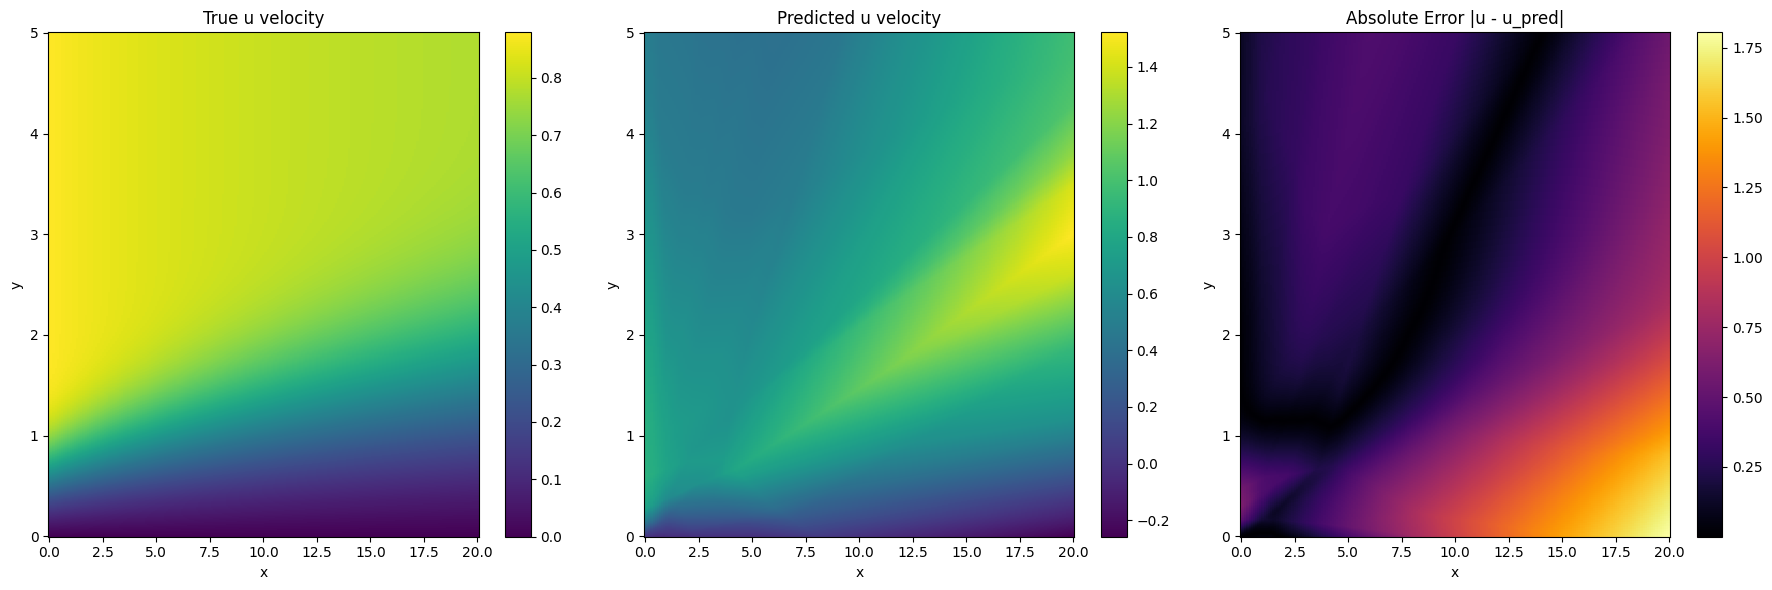

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Compute predicted u and error
u_pred = model(pos)[:, 0].reshape(u.shape)  # shape = (501, 201)
v_pred = model(pos)[:, 1].reshape(v.shape)  # shape = (501, 201)
p_pred = model(pos)[:, 2].reshape(p.shape)  # shape = (501, 201)
p_pred=p_pred+11
error_u = np.abs(u - u_pred)  # or (u - u_pred) for signed error
error_v = np.abs(v - v_pred)
error_p = np.abs(p - p_pred)
# Create figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# True u
im1 = axs[0].pcolormesh(x, y, u, shading='auto', cmap='viridis')
fig.colorbar(im1, ax=axs[0])
axs[0].set_title('True u velocity')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Predicted u
im2 = axs[1].pcolormesh(x, y, u_pred, shading='auto', cmap='viridis')
fig.colorbar(im2, ax=axs[1])
axs[1].set_title('Predicted u velocity')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# Error plot
im3 = axs[2].pcolormesh(x, y, error, shading='auto', cmap='inferno')
fig.colorbar(im3, ax=axs[2])
axs[2].set_title('Absolute Error |u - u_pred|')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')

plt.tight_layout()
plt.show()

In [104]:
mean_u = np.mean(error_u)
mean_v = np.mean(error_v)
mean_p = np.mean(error_p)
print("U_Error(%) :", mean_u*100)
print("V_Error(%) :", mean_v*100)
print("P_Error(%) :", mean_p*100)

U_Error(%) : 27.828249
V_Error(%) : 42.84139
P_Error(%) : 320.17612
